In [17]:
import numpy as np
from numpy import sin,cos,pi
import matplotlib.pyplot as plt

In [18]:
def setdefaults():
  plt.rcParams.update({'font.size': 22})
  plt.rcParams['lines.linewidth'] = 3

In [19]:
setdefaults()

# Homework #3 _work in progress_
## Problem 1

![Pendulum bob attached to springs](https://lh3.googleusercontent.com/5AK02jy9wnB40EV0Uya_H66cf_EHGNT6ScHf2zWBYcKe_Jc_Y_GA4PIa8WCovvNKsfLa2oqGuuRkJ5S2uOulcgAmcfpJkUtxSa8a9Och8aQL7KJKNBr2EuLvTyMU9Lxb-VmiwTSfuf2qBZj1Q14ezH5l_NujSj2HuERr_lPPy3olSjRraASVfUUifugYQJidyhqxDw7eAgR_mGySxxzGYY1MQ6JhGLJY-6kVpaeXWhbs4GFKJploT_llQL1yppEw03vo-XebLwFOHRLn3djty-TttF-d2TVLvquoMZ5k9mj2aYKvrsizeS8qszY9w-yX_V9LMbJPjK1NiEI9knOLcHD18aJI-SDRsfPn7soCQ6hBU_Xn4mtsNM2Ytx6WacyEdmXkOWwmfyhmyLYNfidKlmGlE2yd8NyiMoeQwiZXOKY_p2O3AzRuJtcm80fiTdzTFn0DJUJkOOmK0Fx-sJCaK-JZ7zFWwJYmv4phZ1GmA-G83-7GZ3q1N2qZt90ofrR1nIJhfY0d2z2AbFN9yt9WJ9sqNReRvxv2T5c7Rx1jhLfHjJ0WhH4o61GSnKjq8w28IJFZ_vVqA34svV_qT0fVw1YqhwAShtfs4OSIgH5bUXbsG_2HVNqFP0Jywjo-rlmFA7tDmkCyuAr4QVWzDfmcroJ6uPY3G1eHaUX2zrGu2YDV_3zvwsUsDw=w489-h401-no)

The pendulum bob of mass m , shown in the figure above, is suspended by an inextensible
string from the point p. This point is free to move along a straight horizontal line under
the action of the springs, each having a constant k. Assume that the mass is displaced
only slightly from the equilibrium position and released. Neglecting the mass of the
springs, show that the pendulum oscillates with a period of

$P=2\pi\sqrt{\frac{mg+2kr}{2kg}}$

if you use a first-order Taylor series approximation for $\sin\theta\approx\theta$ and $\cos\theta\approx 1$

Solve for $\theta(t)$ if m=0.1 kg, r=1 m, $\theta(0)$=pi/6 rad, and $\dot{\theta}(0)$=0 rad/s for
2 cases:
  
  a. k=20 N/m

  b. k=$\infty$ N/m

  c. Plot the solutions of $\theta(t)$ for 2 periods on one figure

In [ ]:
l=1
m=0.1 
k=20 
g=9.81
P=2*pi/np.sqrt(2*k*g/(2*k*l+m*g))

t=np.linspace(0,2*P);
# your work
# your new solutions, convert rad to deg with 180/pi
# a_inf = 
# a_20 = 

plt.plot(t,a_inf)
plt.plot(t,a_20)
plt.xlabel('time (s)')
plt.ylabel('angle (deg)')

In [21]:
from scipy.linalg import *
from scipy.optimize import fsolve,root

## Intro to function definitions


## Building our own functions.

Functions are saved in memory you can define them with anonymous functions `lambda` and function definitions `def`

Example of storing a function in memory

$f(x,y) = (xy^{3}-x^{3}y)$

In [22]:
f= lambda x,y: (x*y**3-x**3*y)
f(1,0.1)

-0.099

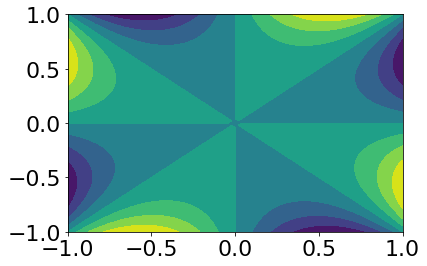

In [23]:
x=np.linspace(-1,1,101); # 10 data points from -1 to 1
y=np.linspace(-1,1,101); # 10 data points from -1 to 1
X,Y=np.meshgrid(x,y); # 100 data points from -1 to 1 on the x- and y-axes
Z=f(X,Y);# Z=f(X,Y) evaluated at the 100 data points

plt.contourf(X,Y,Z) # also pcolor, countour, ...

**For more plotting examples and options check out the [Matplotlib gallery](https://matplotlib.org/gallery/index.html)**

Here we will define a function called `my_ode` for a single-DOF forced spring-mass-damper:

$\ddot{x}+2\dot{x}+9x=\cos(2t)$

In [24]:
def my_ode(t,r):
    """ Help documentation for "my_ode"
     input is time, t (s) and r=[position (m); velocity (m/s)] and time
     output is dr=[velocity (m/s); acceleration (m/s/s)] at time, t
     the ODE is defined by:
    
     a = -2*v-9*x+cos(t/2)"""
    
    dr=np.zeros(np.size(r))
    dr[0]=r[1]
    dr[1]=-2*r[1]-9*r[0]+cos(2*t);
    return dr

Given any `[position, velocity]` and `time`, the defined `my_ode` returns the velocity and acceleration:

In [25]:
my_ode(0,[1, 2])

array([  2., -12.])

## Euler approximation

The simplest integration routine is the Euler approximation. A first-order Taylor series expansion about the current timestep:

$r_{i+1}=r_{i}+\frac{dr_{i}}{dt}\Delta t$

We can integrate the equation as such

In [26]:
dt=0.01
t=np.arange(0,6*pi/2,dt) # (start, stop, by some incr)
x0=0.1
v0=0
r=np.zeros((len(t),2))
r[0,:]=np.array([x0,v0])
for i in range(1,len(t)):
    dr=my_ode(t[i-1],r[i-1,:])
    r[i,:]=r[i-1,:]+dr*dt
    

Text(0, 0.5, 'position (m)')

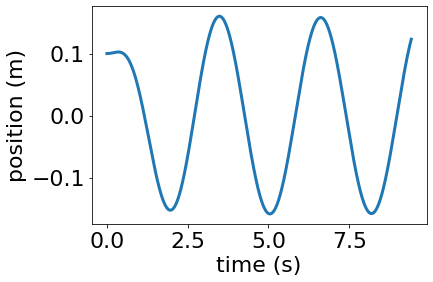

In [27]:
plt.plot(t,r[:,0])
plt.xlabel('time (s)')
plt.ylabel('position (m)')

## Runge-Kutta


Using `solve_ivp` in Python you can use more advanced integration routines, such as [Runge-Kutta 5(4)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#r179348322575-1), [Runge-Kutta 3(2)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#r179348322575-3), [Adams/BDF method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#r179348322575-7), etc. 

Numerical integration algorithms for differential equations:

In [28]:
from scipy.integrate import solve_ivp # import the ordinary differential equation integrator in Python

Text(0, 0.5, 'position (m)')

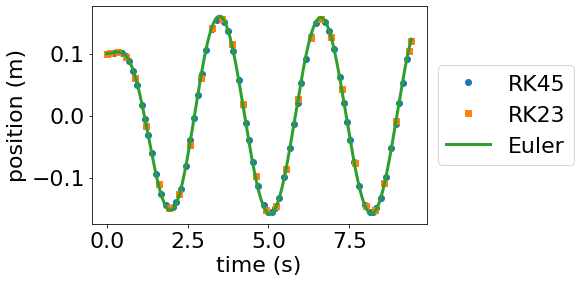

In [29]:

r23=solve_ivp(my_ode,[t[0],t[-1]],[x0, v0],method='RK23');
r45=solve_ivp(my_ode,[t[0],t[-1]],[x0, v0],method='RK45'); # default = 'RK45'
plt.plot(r23.t,r23.y[0],'o',label='RK45')
plt.plot(r45.t,r45.y[0],'s',label='RK23')
plt.plot(t,r[:,0],label='Euler')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#axis([0 10 -0.2 0.3])
plt.xlabel('time (s)')

plt.ylabel('position (m)')

## Problem 2

![Pendulum bob attached to springs](https://lh3.googleusercontent.com/5AK02jy9wnB40EV0Uya_H66cf_EHGNT6ScHf2zWBYcKe_Jc_Y_GA4PIa8WCovvNKsfLa2oqGuuRkJ5S2uOulcgAmcfpJkUtxSa8a9Och8aQL7KJKNBr2EuLvTyMU9Lxb-VmiwTSfuf2qBZj1Q14ezH5l_NujSj2HuERr_lPPy3olSjRraASVfUUifugYQJidyhqxDw7eAgR_mGySxxzGYY1MQ6JhGLJY-6kVpaeXWhbs4GFKJploT_llQL1yppEw03vo-XebLwFOHRLn3djty-TttF-d2TVLvquoMZ5k9mj2aYKvrsizeS8qszY9w-yX_V9LMbJPjK1NiEI9knOLcHD18aJI-SDRsfPn7soCQ6hBU_Xn4mtsNM2Ytx6WacyEdmXkOWwmfyhmyLYNfidKlmGlE2yd8NyiMoeQwiZXOKY_p2O3AzRuJtcm80fiTdzTFn0DJUJkOOmK0Fx-sJCaK-JZ7zFWwJYmv4phZ1GmA-G83-7GZ3q1N2qZt90ofrR1nIJhfY0d2z2AbFN9yt9WJ9sqNReRvxv2T5c7Rx1jhLfHjJ0WhH4o61GSnKjq8w28IJFZ_vVqA34svV_qT0fVw1YqhwAShtfs4OSIgH5bUXbsG_2HVNqFP0Jywjo-rlmFA7tDmkCyuAr4QVWzDfmcroJ6uPY3G1eHaUX2zrGu2YDV_3zvwsUsDw=w489-h401-no)

The pendulum bob of mass m , shown in the figure above, is suspended by an inextensible
string from the point p. This point is free to move along a straight horizontal line under
the action of the springs, each having a constant k. Assume that the mass is displaced
only slightly from the equilibrium position and released. Neglecting the mass of the
springs, show that the pendulum oscillates with a period of

$P=2\pi\sqrt{\frac{mg+2kr}{2kg}}$

solve for the nonlinear equations of motion and use the `solve_ivp` to determine $\theta(t)$

Solve for $\theta(t)$ if m=0.1 kg, r=1 m, $\theta(0)$=pi/6 rad, and $\dot{\theta}(0)$=0 rad/s for
  
k=20 N/m

Plot the linear and nonlinear solutions of $\theta(t)$ for 2 periods on one figure

In [16]:
def bob_ode(t,r,):
    """ Help documentation for "bob_ode"
     input is time, t (s) and r=[position p (m), angle (rad), velocity p (m/s), angle velocity (rad/s)] and time
     output is dr=[velocity p (m/s), angle velocity (rad/s), accel p (m/s/s), angle accel (rad/s/s)] at time, t
     the ODE is defined by:
    
     dr = f(t,r)"""
    l=1
    m=0.1 
    k=20 
    g=9.81
    dr=np.zeros(np.size(r))
    dr[0]=r[2]
    dr[1]=r[3]
    # your work here
    # dr[2] =...
    # dr[3] =... 
    return dr

In [ ]:
P=2*pi/np.sqrt(2*k*g/(2*k*l+m*g))
r=solve_ivp(bob_ode,[0,2*P],[0, pi/6,0,0]); # default = 'RK45'
plt.plot(r.t,r.y[1]*180/pi,'o',label='nonlinear') # <-------------- your new plot, convert rad to deg with 180/pi
plt.plot(t,a_20,'o',label='linear') # from problem 1
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('time (s)')
plt.ylabel('angle (deg)')